### Project Overview
- Volatility 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [9]:
vol_data = pd.read_csv("resources/vix_data_cleaned", parse_dates = True, index_col="dates")

In [11]:
vol_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UVXY              3246 non-null   float64
 1   SPY               3246 non-null   float64
 2   VXXBEN            3246 non-null   float64
 3   VIX               3246 non-null   float64
 4   UX1               3246 non-null   float64
 5   UX2               3246 non-null   float64
 6   UX3               3246 non-null   float64
 7   UX4               3246 non-null   float64
 8   Day of Week       3246 non-null   int64  
 9   Days to Roll      3246 non-null   int64  
 10  Day in Cycle      3229 non-null   float64
 11  Daily Decay       3229 non-null   float64
 12  VXXGREG           3246 non-null   float64
 13  UX1 % returns     3245 non-null   float64
 14  UX2 % returns     3245 non-null   float64
 15  UX3 % returns     3245 non-null   float64
 16  UX4 % returns     3245 n

### Missing Data
- Appears that Days in cycle and Daily Decay are missing 17 data points 
- This is not crucial to the data set since we we have well over 3000 data points

In [13]:
vol_data.isnull().sum()

UVXY                 0
SPY                  0
VXXBEN               0
VIX                  0
UX1                  0
UX2                  0
UX3                  0
UX4                  0
Day of Week          0
Days to Roll         0
Day in Cycle        17
Daily Decay         17
VXXGREG              0
UX1 % returns        1
UX2 % returns        1
UX3 % returns        1
UX4 % returns        1
UVXY % returns       1
SPY % returns        1
VXXBEN % returns     1
VIX % returns        1
regression Slope     1
Inverse Slope        2
dtype: int64

## Visualizations
- Will use seaborn in conjuncetion with matplot lib to create some visualization
- By the graph we can almose say there every two years there is a spike in volatility
- Since this is the inverse of the capital market we can assume a loss

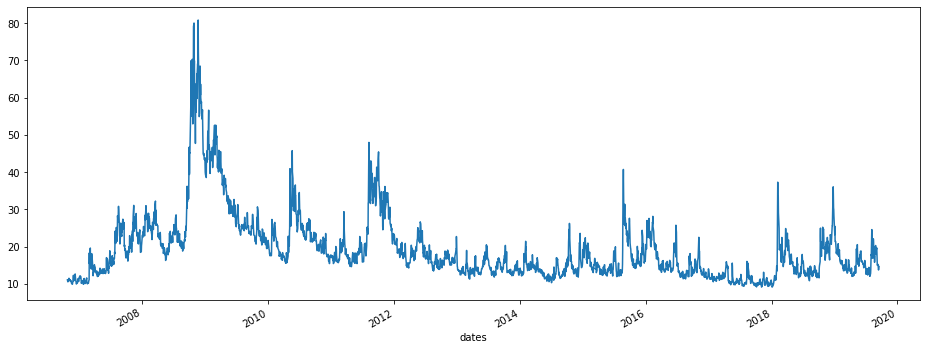

In [17]:
vol_data["VIX"].plot(figsize = (16,6))

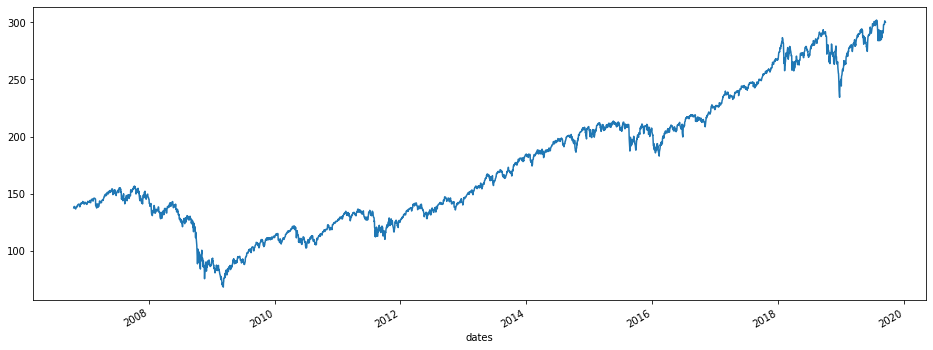

In [20]:
vol_data["SPY"].plot(figsize = (16,6))

## Feature generation 
- we already have a few features in our dat set but we could possible generate more to maybe assist our machines with predictions when created

In [23]:
vol_data.columns

Index(['UVXY', 'SPY', 'VXXBEN', 'VIX', 'UX1', 'UX2', 'UX3', 'UX4',
       'Day of Week', 'Days to Roll', 'Day in Cycle', 'Daily Decay', 'VXXGREG',
       'UX1 % returns', 'UX2 % returns', 'UX3 % returns', 'UX4 % returns',
       'UVXY % returns', 'SPY % returns', 'VXXBEN % returns', 'VIX % returns',
       'regression Slope', 'Inverse Slope'],
      dtype='object')

### Daily vol between UX1 - 4

In [31]:
vol_data["UVX1-4 Daily Vol"] = vol_data[['UX1 % returns', 'UX2 % returns', 'UX3 % returns', 'UX4 % returns']].sum(axis = 1)

In [33]:
vol_data["UX1-4 vol daily returns"] = vol_data["UVX1-4 Daily Vol"].pct_change()

In [36]:
vol_data.replace([np.inf, -np.inf], np.nan, inplace=True)

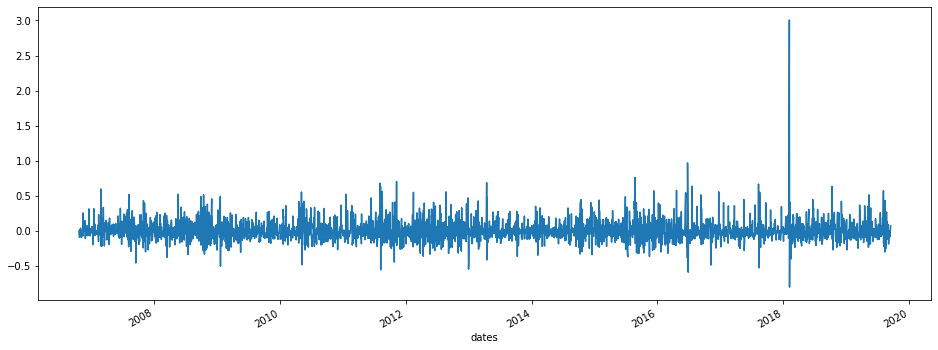

In [39]:
vol_data["UVX1-4 Daily Vol"].plot(figsize = (16,6))

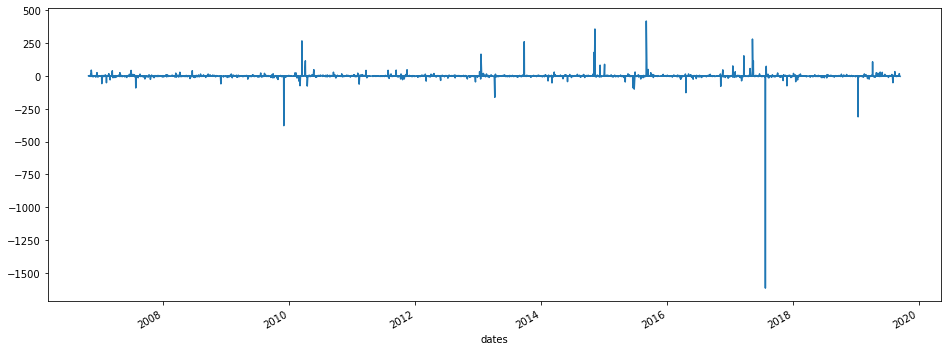

In [41]:
vol_data["UX1-4 vol daily returns"].plot(figsize = (16,6))

In [54]:
vol_data["reg/ uvx1-4"] = (vol_data["regression Slope"]/np.abs(vol_data["UVX1-4 Daily Vol"]))

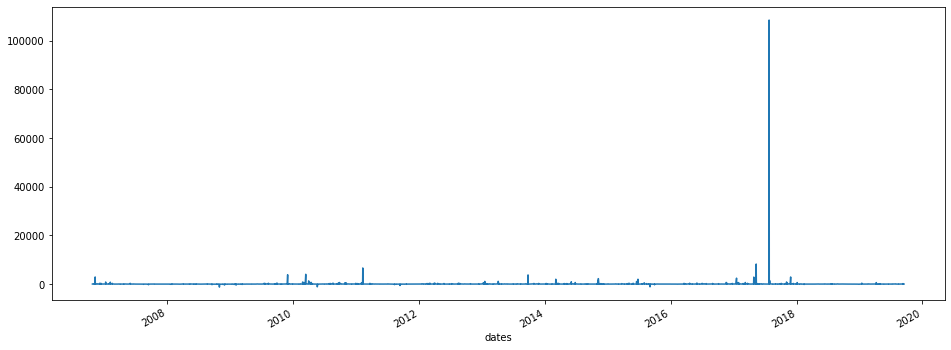

In [57]:
vol_data["reg/ uvx1-4"].plot(figsize = (16,6))

In [60]:
vol_data["inverse_slope/UX1-4 daily"] = np.abs((vol_data["Inverse Slope"] / vol_data["UX1-4 vol daily returns"]))

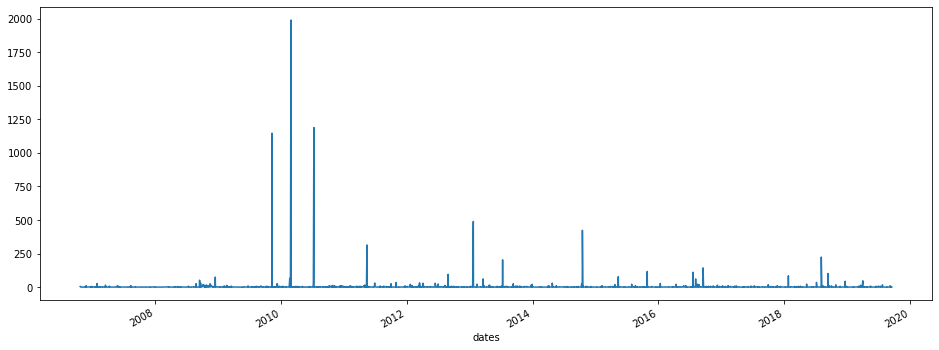

In [66]:
vol_data["inverse_slope/UX1-4 daily"].plot(figsize = (16,6))

In [67]:
vol_data

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll,...,UVXY % returns,SPY % returns,VXXBEN % returns,VIX % returns,regression Slope,Inverse Slope,UVX1-4 Daily Vol,UX1-4 vol daily returns,reg/ uvx1-4,inverse_slope/UX1-4 daily
dates,,,,,,,,,,,,,,,,,,,,,
2006-10-23,8.377069e+09,137.47,1.9100,11.08,11.950,13.160,14.080,14.600,2,17,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2006-10-24,8.377069e+09,137.88,2.0250,10.78,11.780,12.830,14.030,14.470,3,16,...,0.000000,0.002982,0.060209,-0.027076,0.963,NaN,-0.051757,NaN,18.606116,NaN
2006-10-25,7.968986e+09,138.35,1.7600,10.66,11.490,12.520,13.790,14.520,4,15,...,-0.048714,0.003409,-0.130864,-0.011132,1.002,-1.002,-0.062431,0.206227,16.049746,4.858728
2006-10-26,7.618653e+09,138.78,1.5150,10.56,11.250,12.210,13.460,14.180,5,14,...,-0.043962,0.003108,-0.139205,-0.009381,0.945,-0.945,-0.092994,0.489559,10.161894,1.930310
2006-10-27,7.695087e+09,137.91,1.2400,10.80,11.310,12.260,13.460,14.240,6,13,...,0.010032,-0.006269,-0.181518,0.022727,0.903,-0.903,0.013660,-1.146887,66.107115,0.787349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-10,2.730000e+01,298.13,2.2625,15.20,16.225,17.675,18.025,17.875,2,5,...,-0.004739,-0.000235,-0.040297,-0.004584,0.715,-0.715,-0.003769,-0.811541,189.703483,0.881040
2019-09-11,2.661000e+01,300.25,2.4725,14.61,15.725,17.325,17.825,17.725,3,4,...,-0.025275,0.007111,0.092818,-0.038816,0.833,-0.833,-0.070106,17.600474,11.882019,0.047328
2019-09-12,2.565000e+01,301.29,2.1575,14.22,14.975,17.025,17.625,17.575,4,3,...,-0.036077,0.003464,-0.127401,-0.026694,0.936,-0.936,-0.084694,0.208080,11.051604,4.498264


In [91]:
vol_data["1-4 * dow/dtr"] = (vol_data["UVX1-4 Daily Vol"] * (vol_data["Day of Week"]/vol_data["Days to Roll"]))

In [92]:
vol_data

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll,...,SPY % returns,VXXBEN % returns,VIX % returns,regression Slope,Inverse Slope,UVX1-4 Daily Vol,UX1-4 vol daily returns,reg/ uvx1-4,inverse_slope/UX1-4 daily,1-4 * dow/dtr
dates,,,,,,,,,,,,,,,,,,,,,
2006-10-23,8.377069e+09,137.47,1.9100,11.08,11.950,13.160,14.080,14.600,2,17,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
2006-10-24,8.377069e+09,137.88,2.0250,10.78,11.780,12.830,14.030,14.470,3,16,...,0.002982,0.060209,-0.027076,0.963,NaN,-0.051757,NaN,18.606116,NaN,-0.009704
2006-10-25,7.968986e+09,138.35,1.7600,10.66,11.490,12.520,13.790,14.520,4,15,...,0.003409,-0.130864,-0.011132,1.002,-1.002,-0.062431,0.206227,16.049746,4.858728,-0.016648
2006-10-26,7.618653e+09,138.78,1.5150,10.56,11.250,12.210,13.460,14.180,5,14,...,0.003108,-0.139205,-0.009381,0.945,-0.945,-0.092994,0.489559,10.161894,1.930310,-0.033212
2006-10-27,7.695087e+09,137.91,1.2400,10.80,11.310,12.260,13.460,14.240,6,13,...,-0.006269,-0.181518,0.022727,0.903,-0.903,0.013660,-1.146887,66.107115,0.787349,0.006304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-10,2.730000e+01,298.13,2.2625,15.20,16.225,17.675,18.025,17.875,2,5,...,-0.000235,-0.040297,-0.004584,0.715,-0.715,-0.003769,-0.811541,189.703483,0.881040,-0.001508
2019-09-11,2.661000e+01,300.25,2.4725,14.61,15.725,17.325,17.825,17.725,3,4,...,0.007111,0.092818,-0.038816,0.833,-0.833,-0.070106,17.600474,11.882019,0.047328,-0.052579
2019-09-12,2.565000e+01,301.29,2.1575,14.22,14.975,17.025,17.625,17.575,4,3,...,0.003464,-0.127401,-0.026694,0.936,-0.936,-0.084694,0.208080,11.051604,4.498264,-0.112925


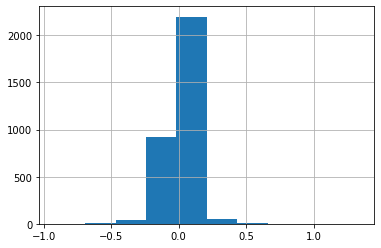

In [95]:
vol_data["1-4 * dow/dtr"].hist()

### Data Correlation

In [93]:
vol_data.corr()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll,...,SPY % returns,VXXBEN % returns,VIX % returns,regression Slope,Inverse Slope,UVX1-4 Daily Vol,UX1-4 vol daily returns,reg/ uvx1-4,inverse_slope/UX1-4 daily,1-4 * dow/dtr
UVXY,1.000000,-0.475047,-0.357154,0.771315,0.785337,0.770733,0.736403,0.700645,-0.002409,-0.011400,...,-0.041341,0.035609,0.001745,-0.563871,0.563995,0.013811,-0.006886,-0.017369,-0.004905,0.045900
SPY,-0.475047,1.000000,0.091179,-0.557329,-0.593727,-0.651158,-0.683749,-0.705426,0.000735,-0.004603,...,0.020664,-0.049777,-0.000239,0.115976,-0.116058,-0.003952,-0.010461,0.024420,-0.031429,-0.026313
VXXBEN,-0.357154,0.091179,1.000000,-0.612038,-0.457658,-0.324754,-0.264285,-0.227235,0.051967,0.088781,...,0.256916,0.029345,-0.261363,0.882418,-0.882417,-0.203181,-0.013236,0.024828,0.007126,-0.137952
VIX,0.771315,-0.557329,-0.612038,1.000000,0.982393,0.942683,0.911452,0.887157,-0.013861,-0.006885,...,-0.135301,0.012636,0.103717,-0.754450,0.754460,0.120011,0.009354,-0.035107,0.008137,0.108408
UX1,0.785337,-0.593727,-0.457658,0.982393,1.000000,0.979682,0.955917,0.935743,-0.000496,0.018197,...,-0.088878,0.020153,0.051477,-0.659196,0.659195,0.089412,0.007448,-0.033600,0.009215,0.092781
UX2,0.770733,-0.651158,-0.324754,0.942683,0.979682,1.000000,0.993003,0.982172,-0.002408,0.015233,...,-0.066358,0.028603,0.029030,-0.508819,0.508795,0.057902,0.005819,-0.032017,0.016041,0.067252
UX3,0.736403,-0.683749,-0.264285,0.911452,0.955917,0.993003,1.000000,0.995983,-0.002372,0.010849,...,-0.054576,0.031170,0.018066,-0.423241,0.423202,0.041484,0.005658,-0.031407,0.021376,0.053993
UX4,0.700645,-0.705426,-0.227235,0.887157,0.935743,0.982172,0.995983,1.000000,-0.002885,0.009328,...,-0.047701,0.031893,0.010384,-0.368505,0.368456,0.030577,0.006344,-0.031120,0.024075,0.045651
Day of Week,-0.002409,0.000735,0.051967,-0.013861,-0.000496,-0.002408,-0.002372,-0.002885,1.000000,0.104752,...,-0.014272,-0.019908,-0.080570,0.017658,-0.017660,0.033426,0.012358,-0.012327,-0.028314,0.019812
Days to Roll,-0.011400,-0.004603,0.088781,-0.006885,0.018197,0.015233,0.010849,0.009328,0.104752,1.000000,...,-0.029282,0.026338,0.022090,0.014505,-0.014418,0.106104,-0.022137,0.013485,-0.016870,0.087105


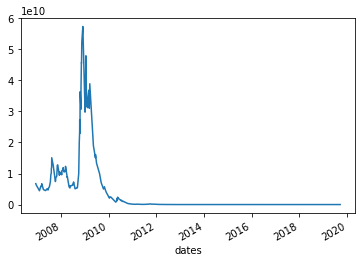

In [100]:
vol_data[vol_data["1-4 * dow/dtr"] * 100 > 5]["UVXY"].plot()